# Rotating Coil Data Analysis for TB Quadrupole Magnets

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials_used = [
    '001', '002', '003', '004', '005', '006', '007', '008', '009', '010',
    '011', '012',
]

serials_unused = [
]

serials = sorted(serials_used + serials_unused)

# Load all data
RotCoilMeas_TBQuad.family_folder = ''
data = MagnetsAnalysis(RotCoilMeas_TBQuad, serials)
data.init()

# Print info
data.print_info()

index: 00, serial_number: 001, data sets: ['M1']
index: 01, serial_number: 002, data sets: ['M1']
index: 02, serial_number: 003, data sets: ['M1']
index: 03, serial_number: 004, data sets: ['M1']
index: 04, serial_number: 005, data sets: ['M1']
index: 05, serial_number: 006, data sets: ['M1']
index: 06, serial_number: 007, data sets: ['M1']
index: 07, serial_number: 008, data sets: ['M1']
index: 08, serial_number: 009, data sets: ['M1']
index: 09, serial_number: 010, data sets: ['M1']
index: 10, serial_number: 011, data sets: ['M1']
index: 11, serial_number: 012, data sets: ['M1']


## Maximum Integrated Quadrupole

index:00, serial:001, idx:30, max_current:    +9.9978 [A], diff_spec: +3.84 [%]
index:01, serial:002, idx:30, max_current:    +9.9978 [A], diff_spec: +3.72 [%]
index:02, serial:003, idx:30, max_current:   +10.0079 [A], diff_spec: +3.71 [%]
index:03, serial:004, idx:54, max_current:    +9.9977 [A], diff_spec: +3.70 [%]
index:04, serial:005, idx:54, max_current:    +9.9977 [A], diff_spec: +3.74 [%]
index:05, serial:006, idx:54, max_current:    +9.9977 [A], diff_spec: +3.83 [%]
index:06, serial:007, idx:30, max_current:    +9.9977 [A], diff_spec: +3.76 [%]
index:07, serial:008, idx:30, max_current:    +9.9980 [A], diff_spec: +3.77 [%]
index:08, serial:009, idx:54, max_current:    +9.9974 [A], diff_spec: +3.69 [%]
index:09, serial:010, idx:54, max_current:    +9.9978 [A], diff_spec: +3.72 [%]
index:10, serial:011, idx:54, max_current:    +9.9977 [A], diff_spec: +3.73 [%]
index:11, serial:012, idx:30, max_current:    +9.9977 [A], diff_spec: +3.73 [%]


<IPython.core.display.Javascript object>


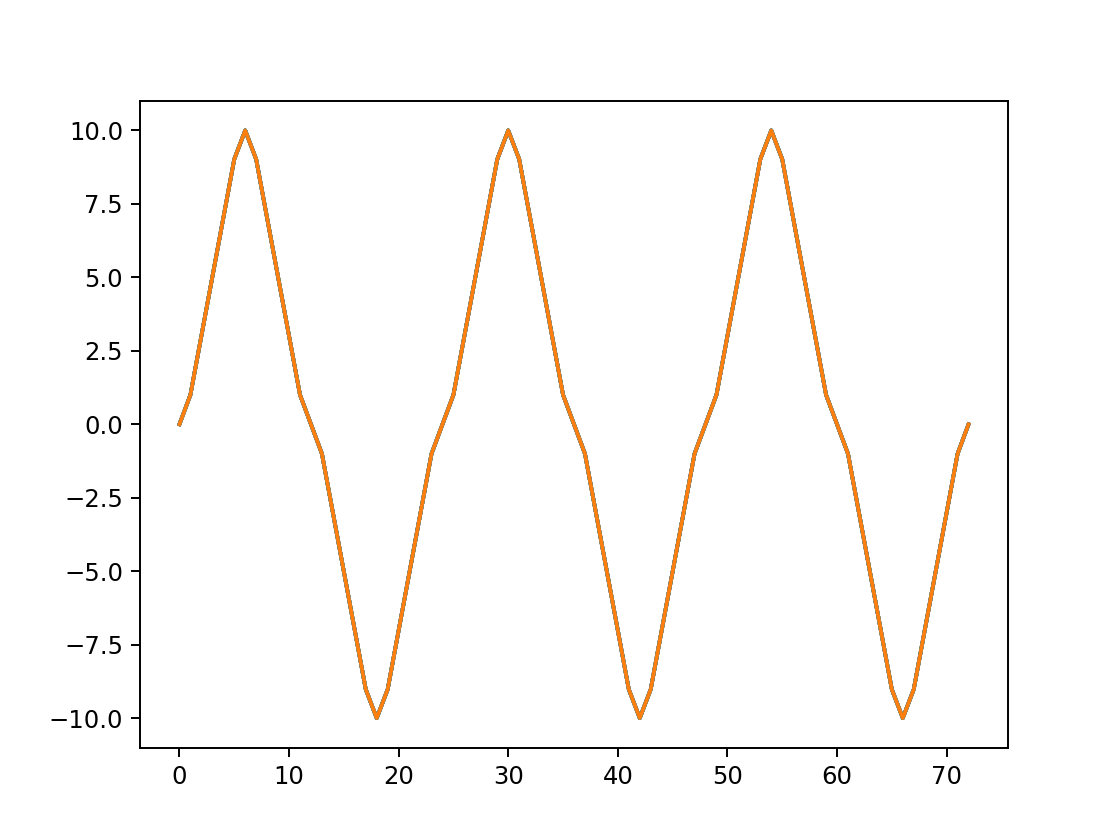

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

# plot currents
plt.figure()
for lab in data._magnetsdata:
    c = data._magnetsdata[lab].get_currents('M1')
    plt.plot(c)
plt.show()

<IPython.core.display.Javascript object>


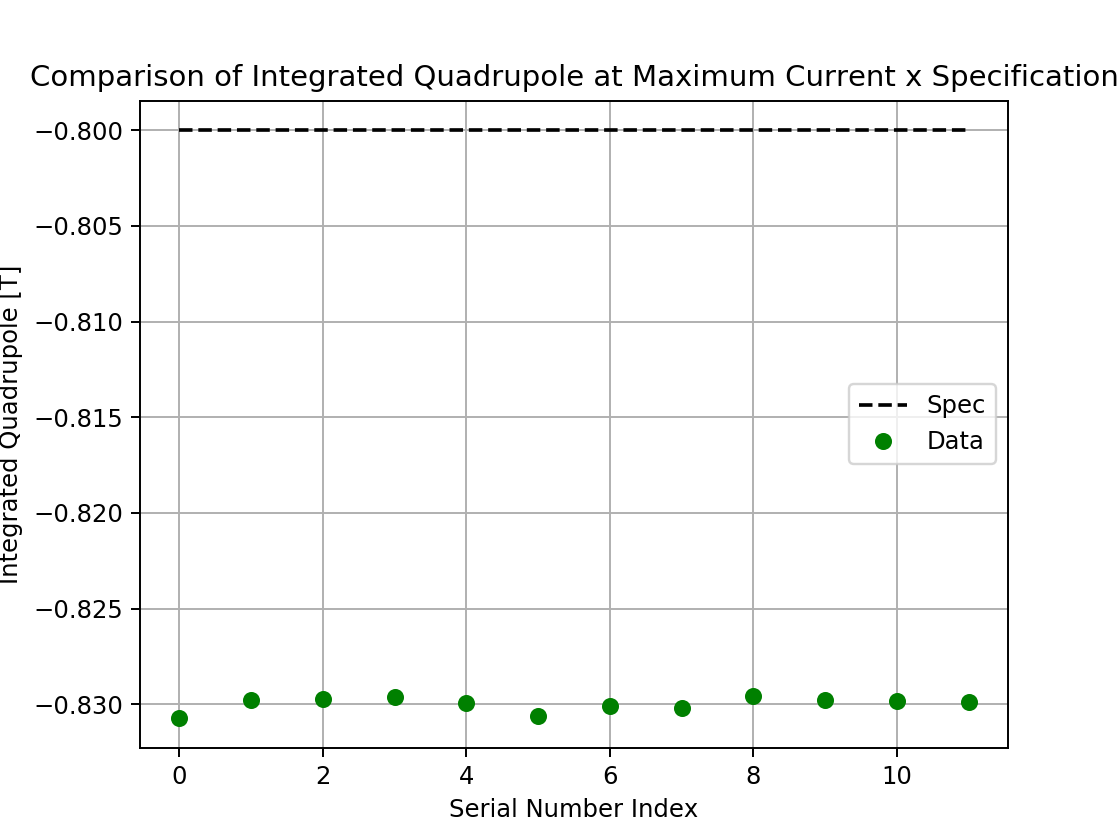

In [4]:
# plot data comparison with spec
plt.figure()
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


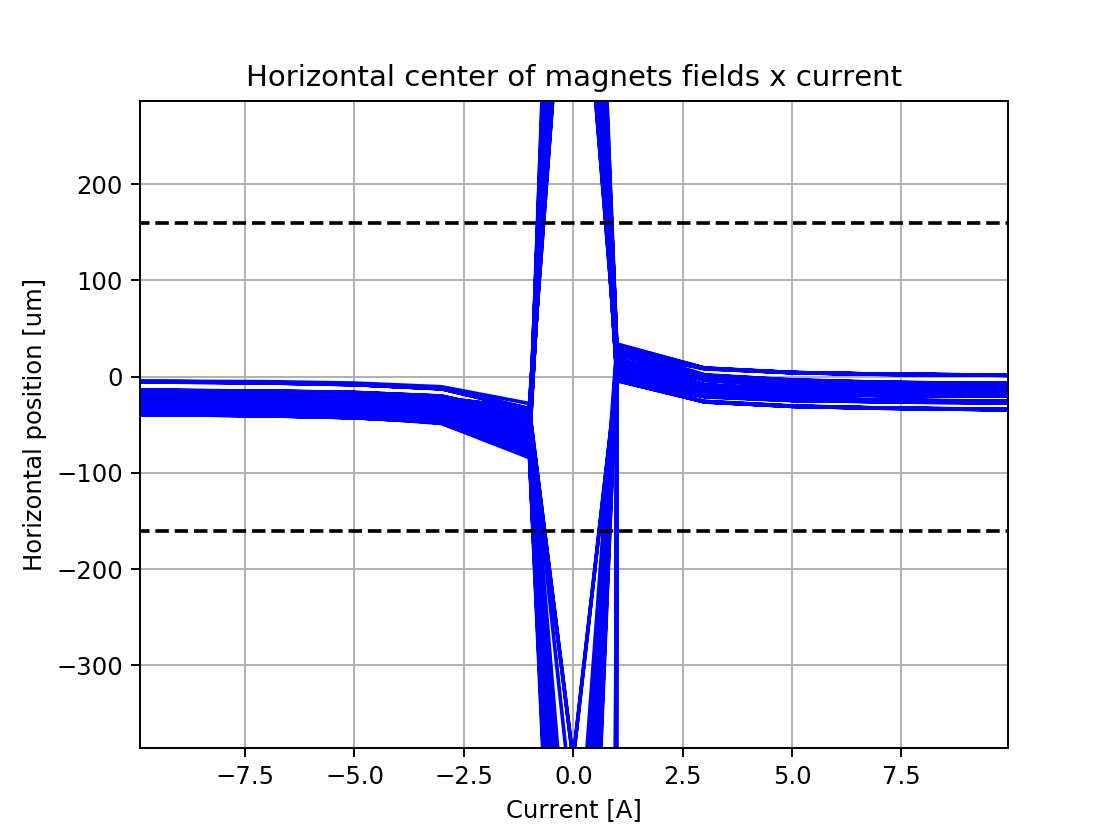

Horizontal center at maximum current [um]: -18.05 ± 9.34


<IPython.core.display.Javascript object>


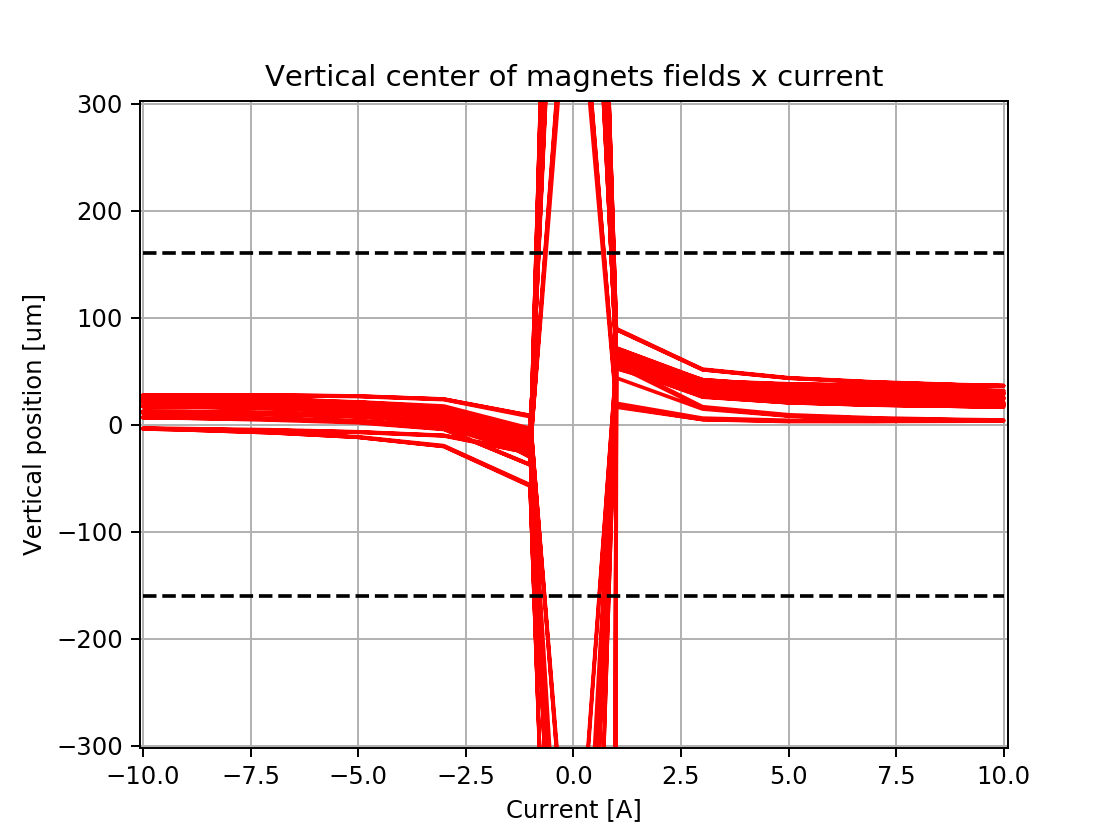

Vertical center at maximum current [um]: +24.58 ± 8.17


In [12]:
# Horizontal center for all magnets x currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

# Vertical center for all magnets y currents
plt.figure()
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


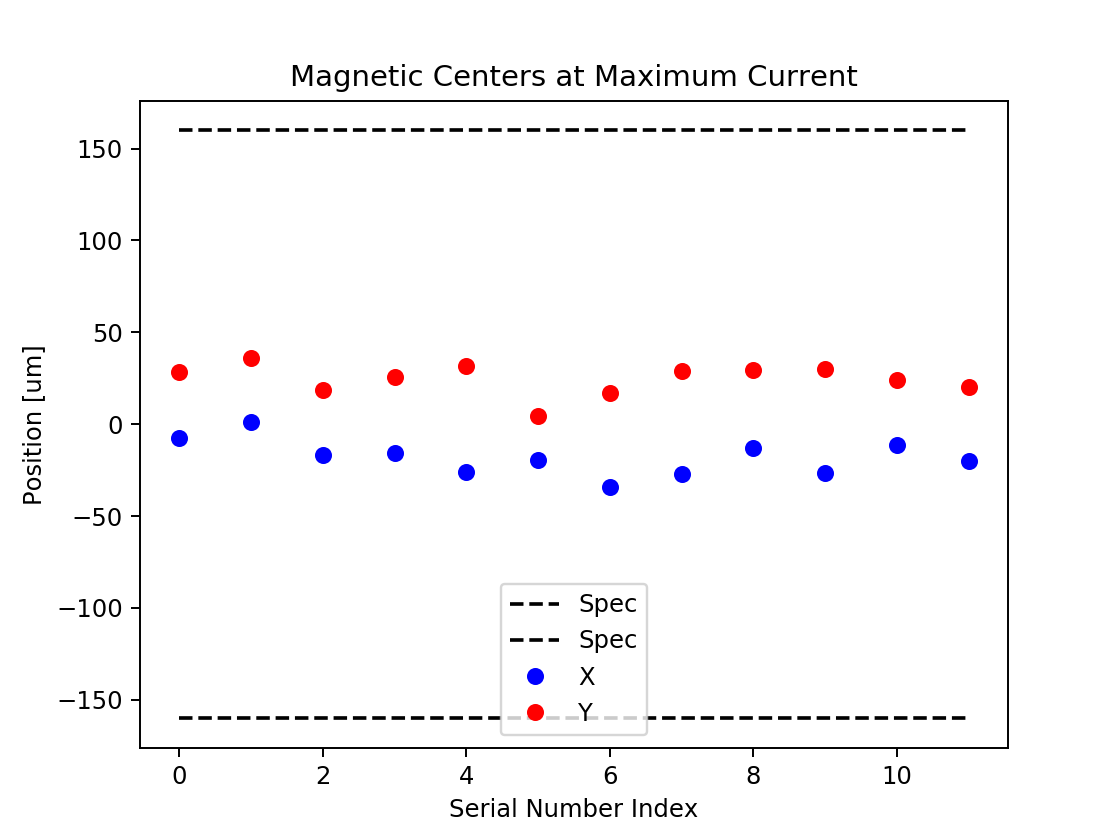

<IPython.core.display.Javascript object>


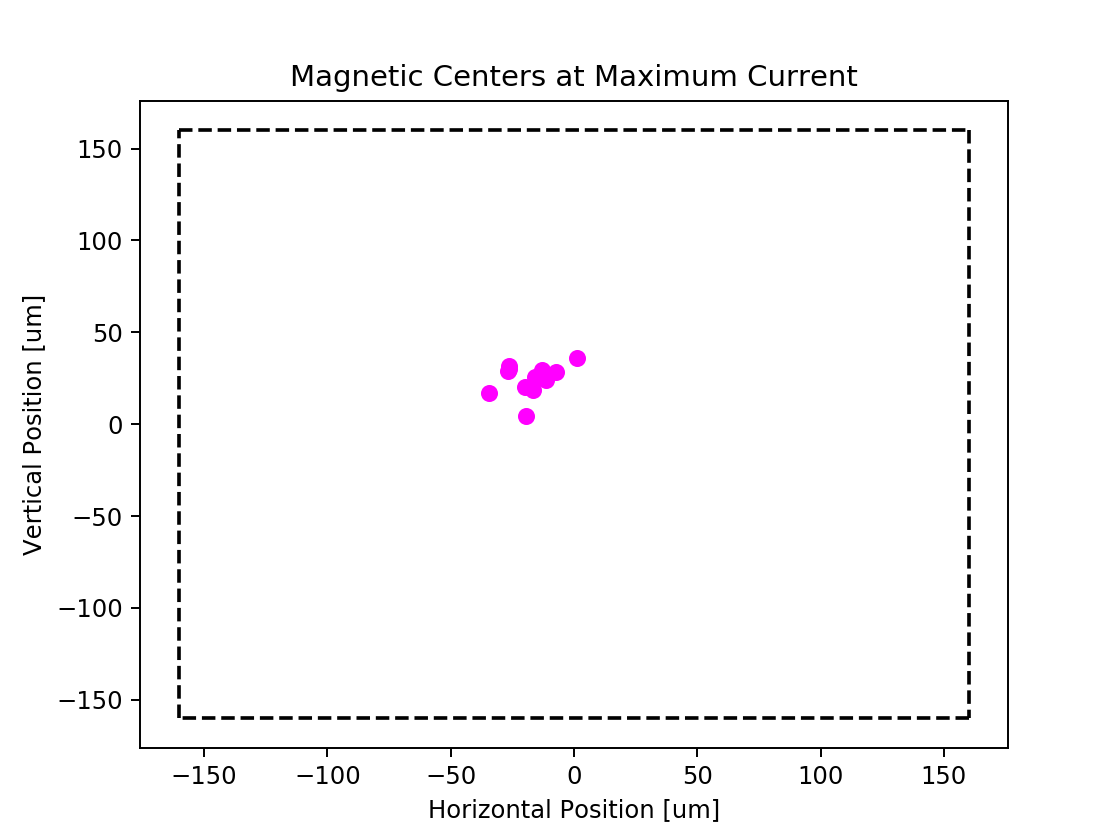

In [13]:
# Horizontal and vertical positions of all magnets
plt.figure()
data.magnetic_center_plot('M1', plt)
plt.show()

# Transverse plane positions
plt.figure()
data.magnetic_center_transverse_plot('M1', plt)
plt.show()

## Ramp Up

<IPython.core.display.Javascript object>


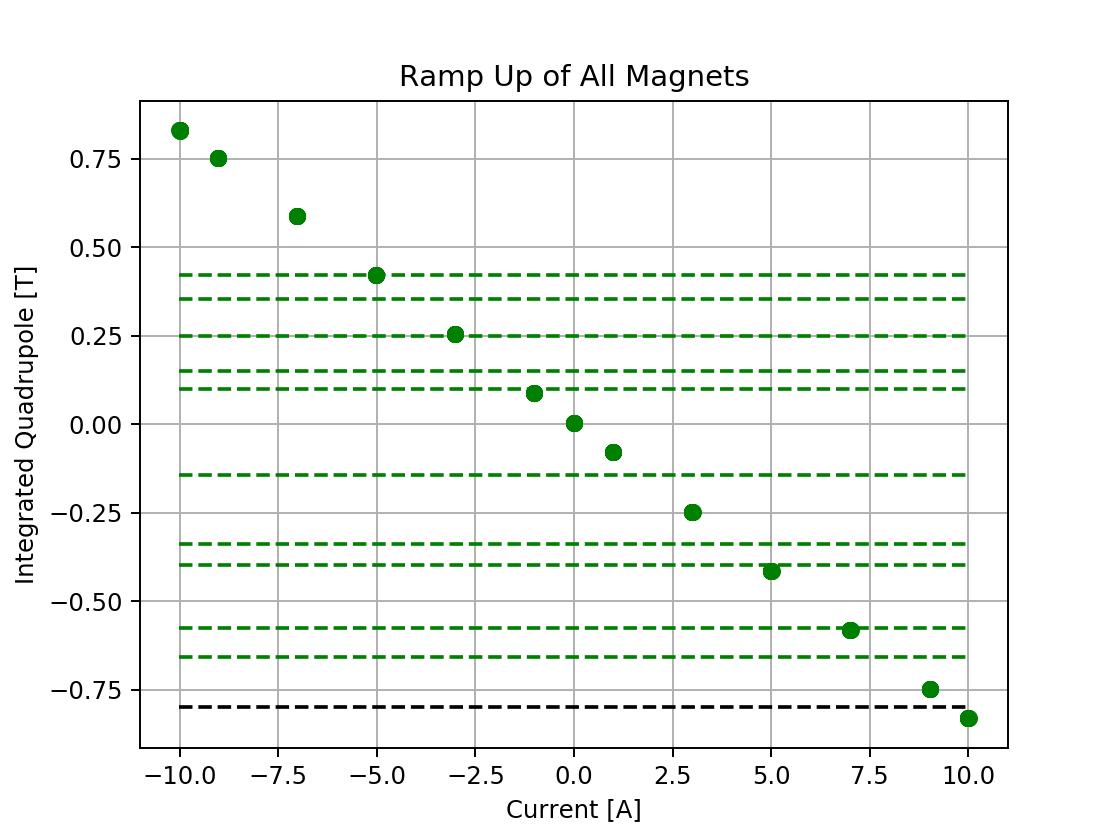

Nominal Integrated Quadrupole [T]:
TB-01:MA-QD1    : +0.421333
TB-01:MA-QF1    : -0.657785
TB-02:MA-QD2A   : +0.250332
TB-02:MA-QF2A   : -0.339395
TB-02:MA-QD2B   : +0.149338
TB-02:MA-QF2B   : -0.144860
TB-03:MA-QD3    : +0.100758
TB-03:MA-QF3    : -0.398425
TB-04:MA-QD4    : +0.354448
TB-04:MA-QF4    : -0.576855

TB-01:MA-QD1   : -05.0 A
TB-01:MA-QF1   : 007.9 A
TB-02:MA-QD2A  : -02.9 A
TB-02:MA-QF2A  : 004.1 A
TB-02:MA-QD2B  : -01.7 A
TB-02:MA-QF2B  : 001.8 A
TB-03:MA-QD3   : -01.2 A
TB-03:MA-QF3   : 004.8 A
TB-04:MA-QD4   : -04.2 A
TB-04:MA-QF4   : 006.9 A


In [3]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

plt.figure()
data.rampup_excitation_curve_plot('M1', 0.15, plt)
plt.show()

# Print currents for nominal strengths
print()
d = data.tmpl.get_nominal_main_intmpole_values(0.15)
for fam, gl in d.items():
    c = data.tmpl.rampup_main_mpole_2_curr('M1', gl)
    print('{:<15s}: {:05.1f} A'.format(fam, c))

<IPython.core.display.Javascript object>


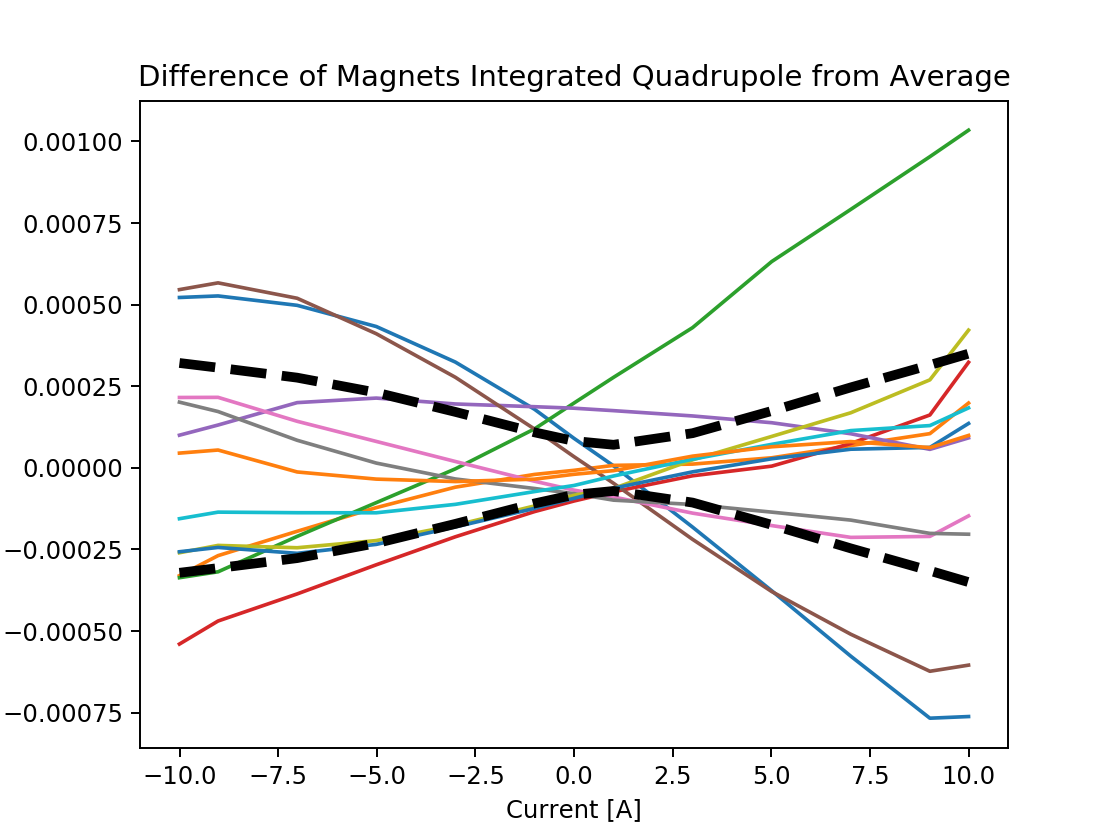

(12, 13)


In [4]:
# Plot rampup dispersion amongst magnets

plt.figure()
data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [5]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current 00:  -10.003 [A], rms_error:  0.0387 [%], max_error:  0.0658 [%]
current 01:   -9.024 [A], rms_error:  0.0408 [%], max_error:  0.0717 [%]
current 02:   -7.019 [A], rms_error:  0.0470 [%], max_error:  0.0848 [%]
current 03:   -5.015 [A], rms_error:  0.0547 [%], max_error:  0.1006 [%]
current 04:   -3.010 [A], rms_error:  0.0672 [%], max_error:  0.1276 [%]
current 05:   -1.005 [A], rms_error:  0.1242 [%], max_error:  0.2394 [%]
current 06:   -0.003 [A], rms_error:  2.0857 [%], max_error:  5.3371 [%]
current 07:   +1.000 [A], rms_error:  0.0887 [%], max_error:  0.2582 [%]
current 08:   +3.004 [A], rms_error:  0.0430 [%], max_error:  0.0812 [%]
current 09:   +5.009 [A], rms_error:  0.0420 [%], max_error:  0.0804 [%]
current 10:   +7.014 [A], rms_error:  0.0424 [%], max_error:  0.0896 [%]
current 11:   +9.019 [A], rms_error:  0.0421 [%], max_error:  0.0937 [%]
current 12:   +9.999 [A], rms_error:  0.0422 [%], max_error:  0.0918 [%]


<IPython.core.display.Javascript object>


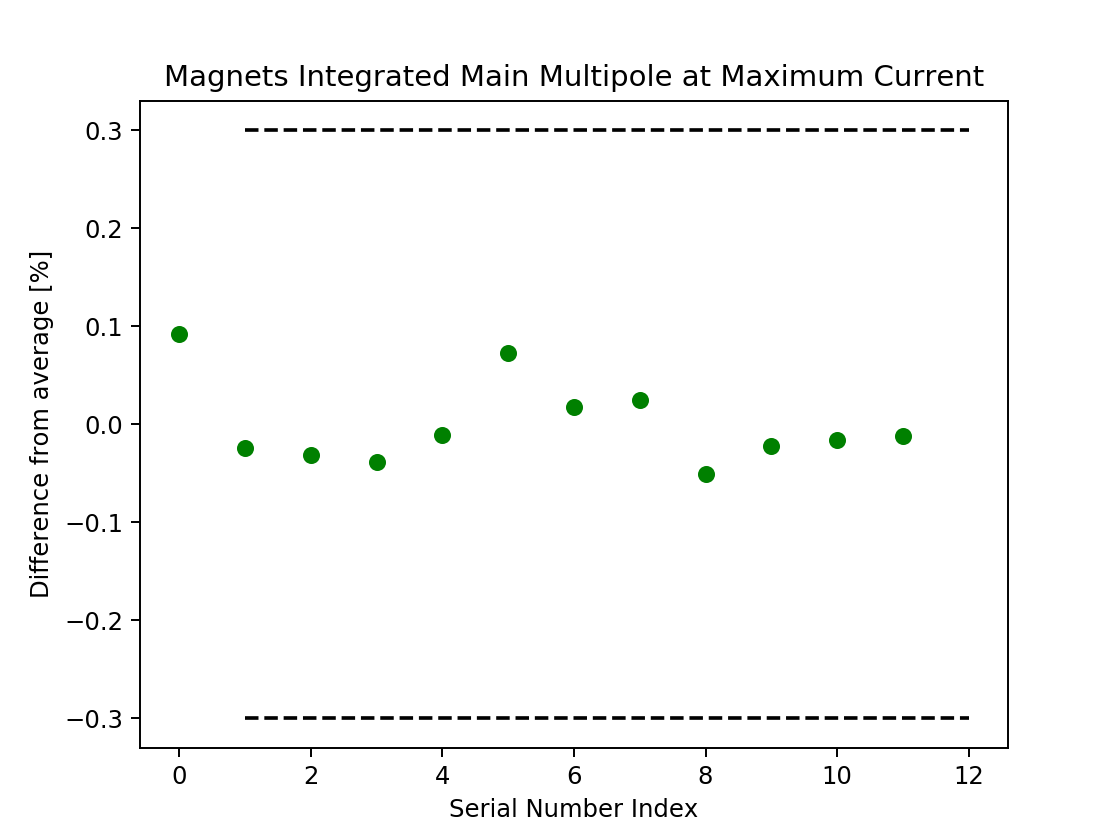

In [6]:
# Plot Integrated Quadrupole Error for maximum current

plt.figure()
data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

# Gradient Roll Error

<IPython.core.display.Javascript object>


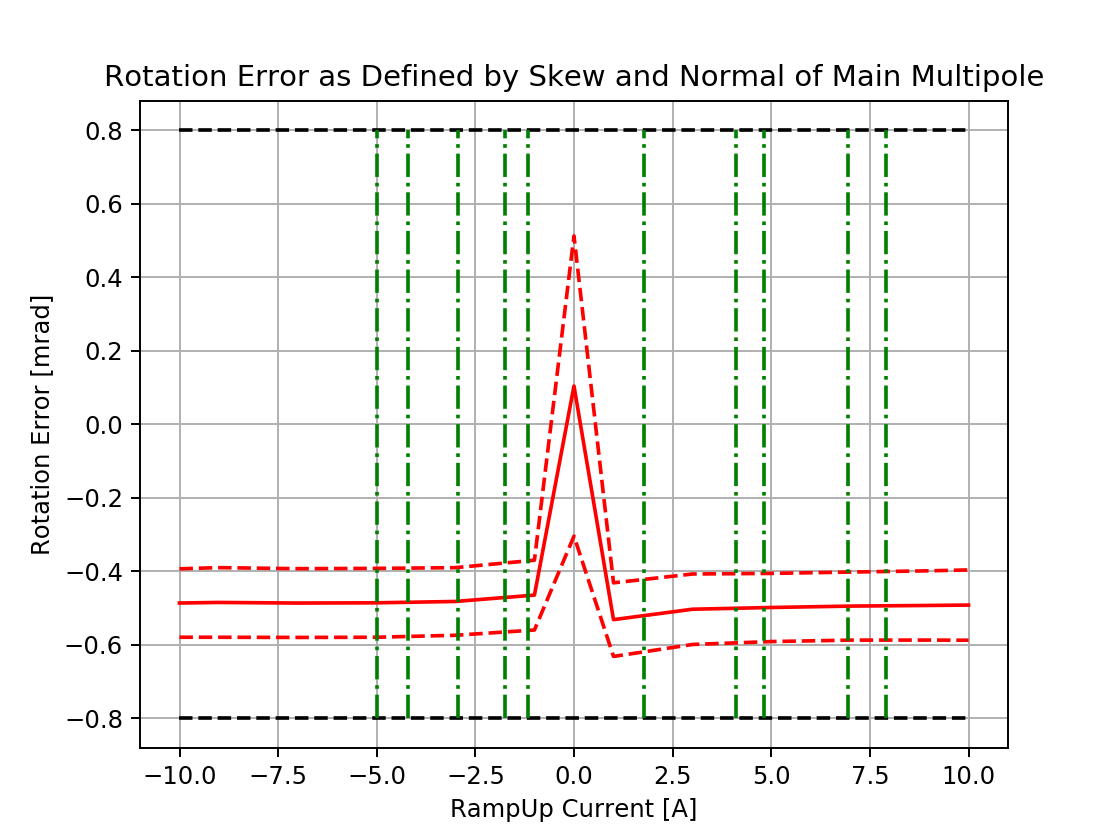

Currents for nominal strengths:
TB-01:MA-QD1: -5.0 A
TB-04:MA-QD4: -4.2 A
TB-02:MA-QD2A: -2.9 A
TB-02:MA-QD2B: -1.7 A
TB-03:MA-QD3: -1.2 A
TB-02:MA-QF2B: 1.8 A
TB-02:MA-QF2A: 4.1 A
TB-03:MA-QF3: 4.8 A
TB-04:MA-QF4: 6.9 A
TB-01:MA-QF1: 7.9 A


<IPython.core.display.Javascript object>


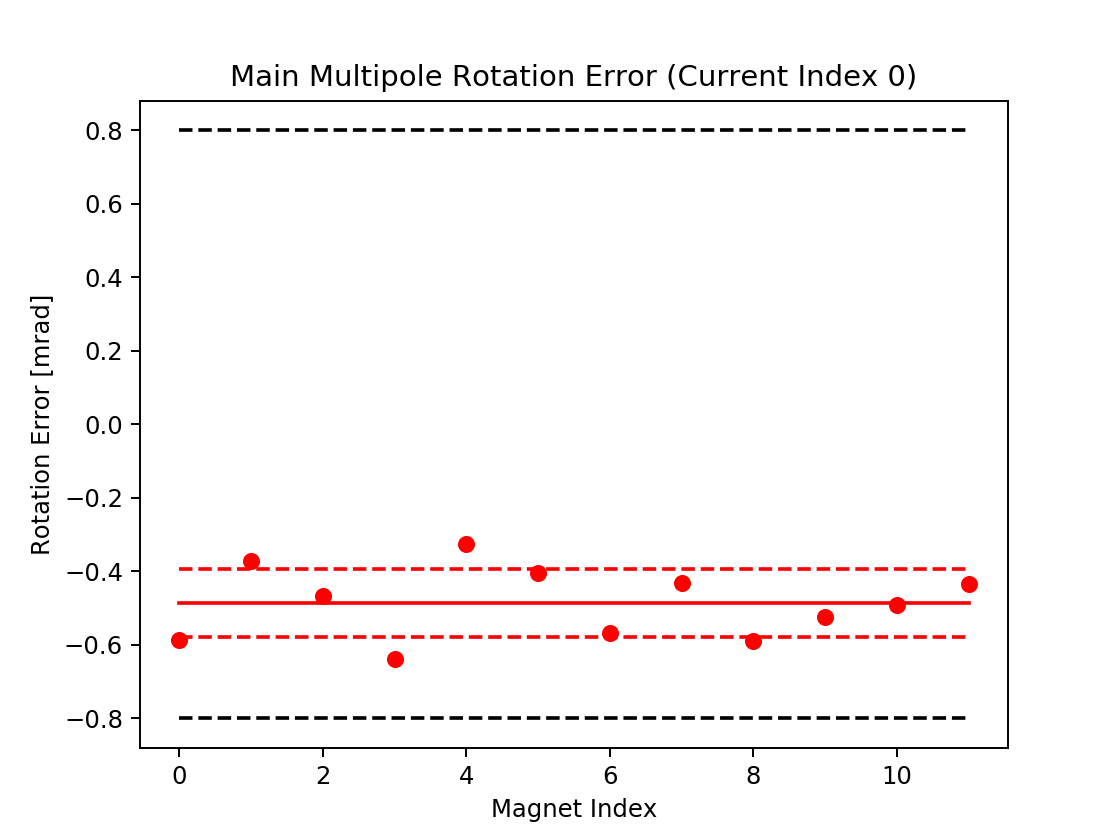

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.487 mrad
Angle error (Std) : +0.093 mrad


<IPython.core.display.Javascript object>


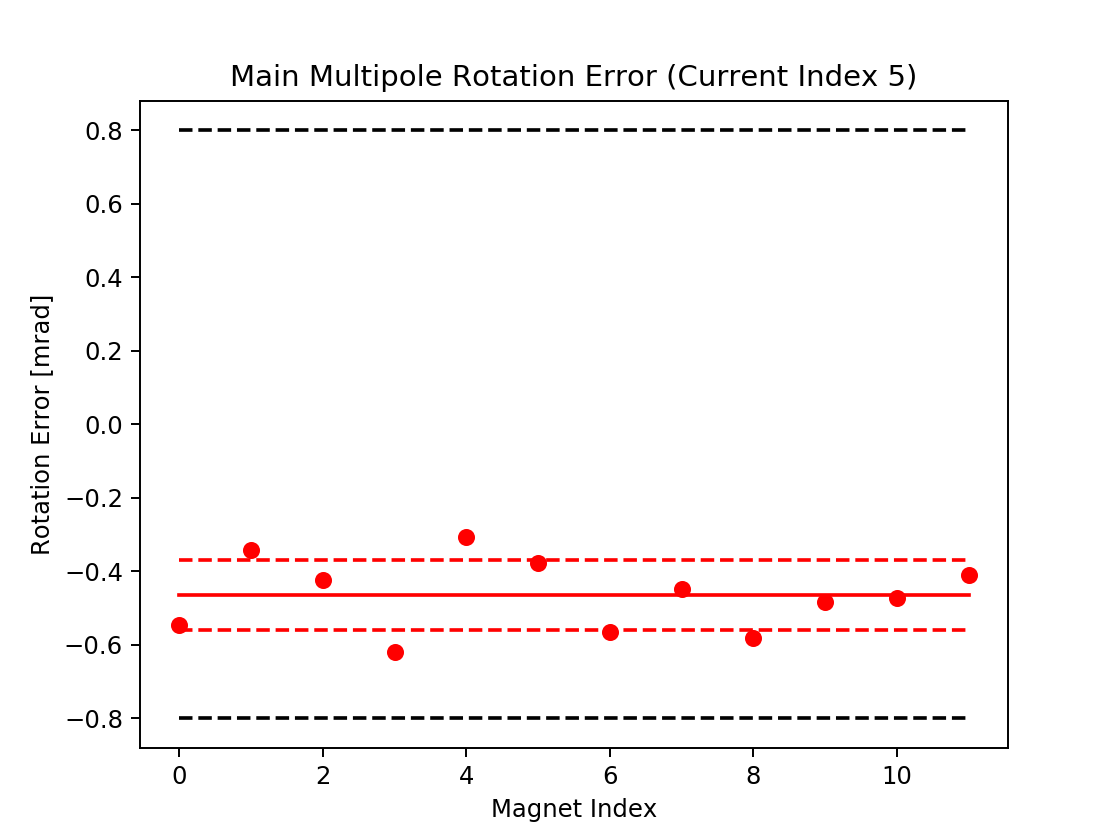

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.465 mrad
Angle error (Std) : +0.095 mrad


<IPython.core.display.Javascript object>


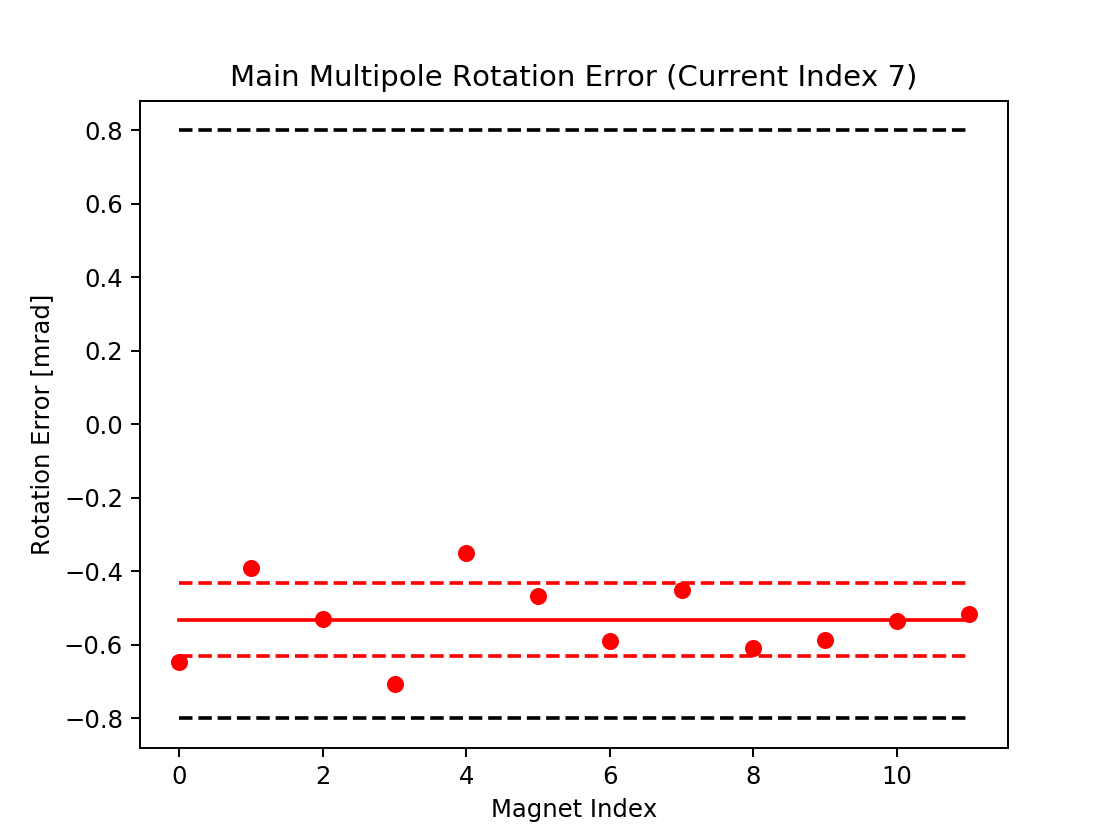

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.532 mrad
Angle error (Std) : +0.100 mrad


<IPython.core.display.Javascript object>


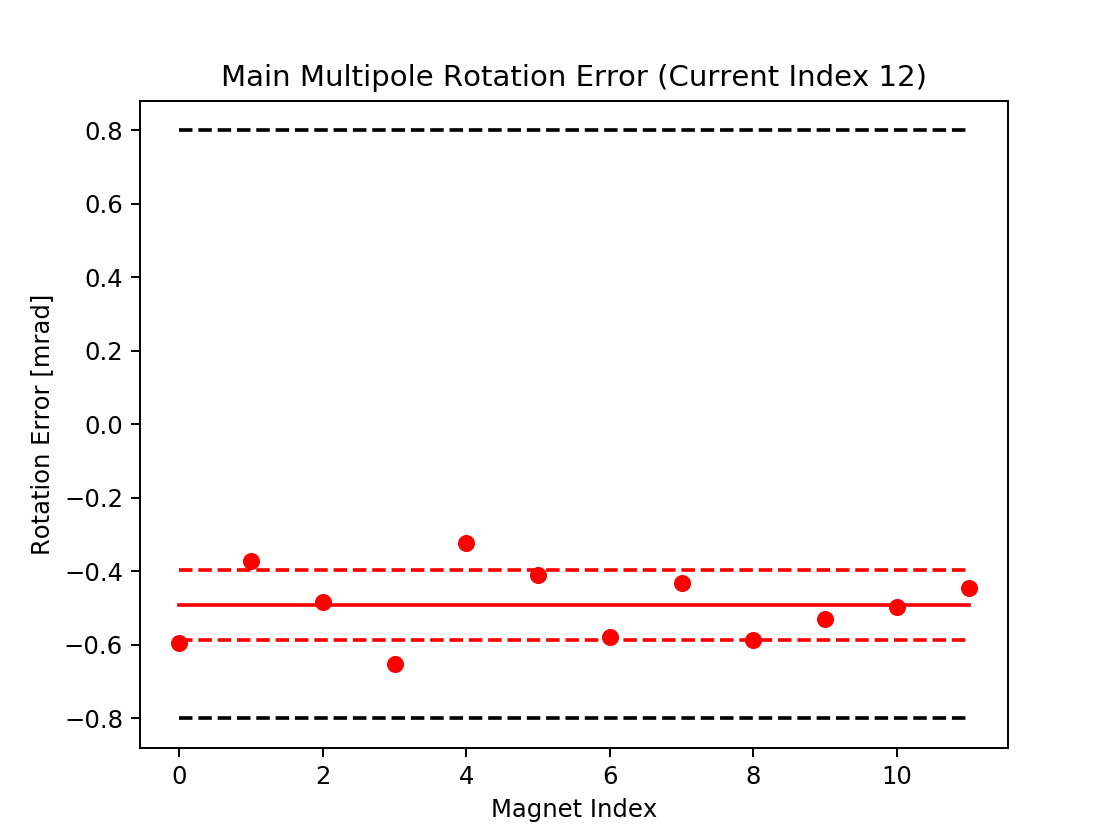

Angle error (Spec): +0.800 mrad
Angle error (Avg) : -0.492 mrad
Angle error (Std) : +0.096 mrad


In [8]:
plt.figure()
data.rotation_error_vs_current_plot('M1', 0.15, plt)
plt.show()

curr_idx = [0, 5, 7, 12]  
for i in curr_idx:
    plt.figure()
    spec, avg, std = data.rotation_error_plot('M1', plt, i)
    plt.show()
    print('Angle error (Spec): {:+.3f} mrad'.format(spec))
    print('Angle error (Avg) : {:+.3f} mrad'.format(avg))
    print('Angle error (Std) : {:+.3f} mrad'.format(std))

## Hysteresis

<IPython.core.display.Javascript object>


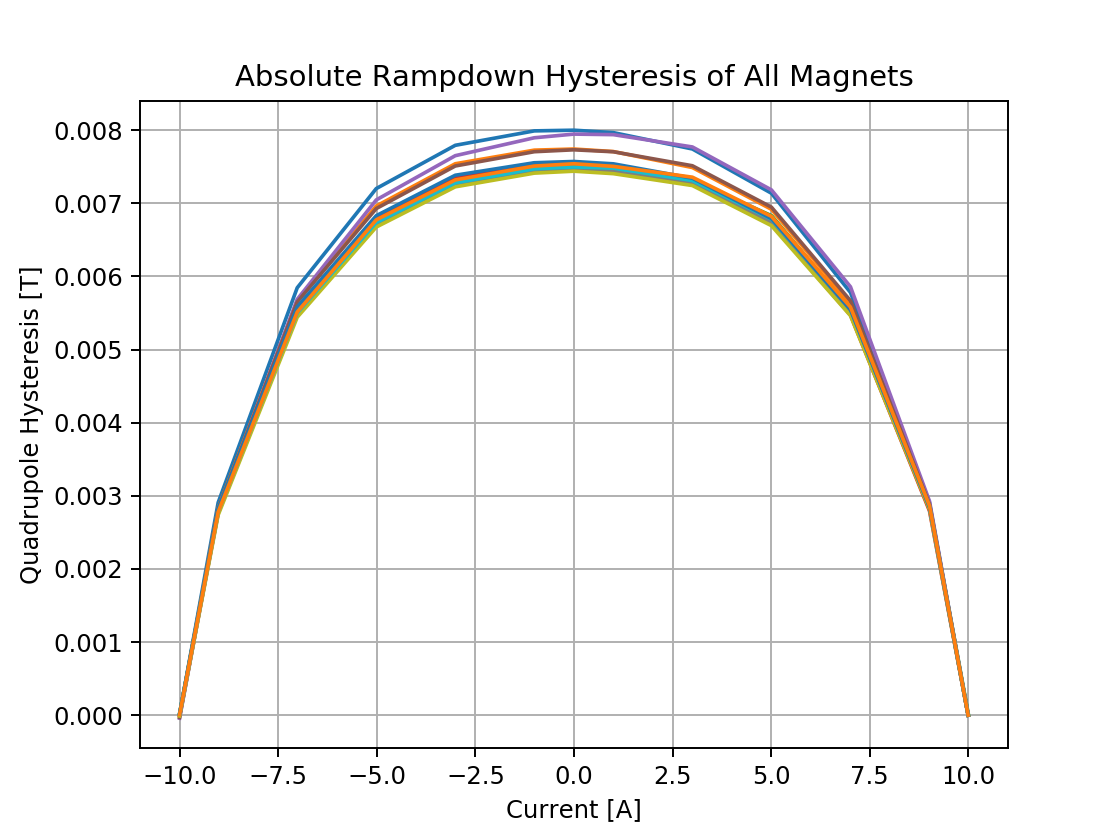

<IPython.core.display.Javascript object>


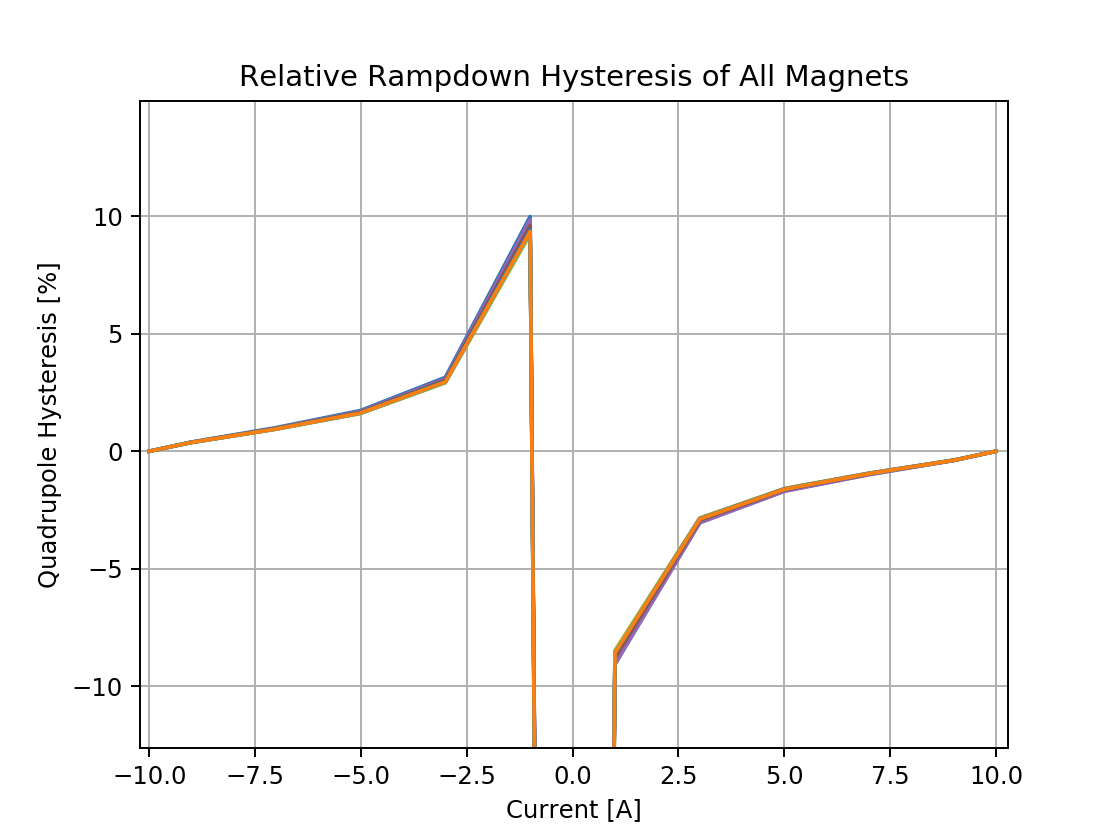

In [3]:
# Absolute
plt.figure()
data.hysteresis_absolute_plot('M1', plt)
plt.show()

# Relative
plt.figure()
data.hysteresis_relative_plot('M1', plt)
plt.show()

## Save Excitation Data Files

In [15]:
# save average excitation data to file

data.save_excdata_average('M2')

In [16]:
# save excitation data of all magnets to separate files
data.save_excdata_individuals('M2')

## Multipoles

<IPython.core.display.Javascript object>


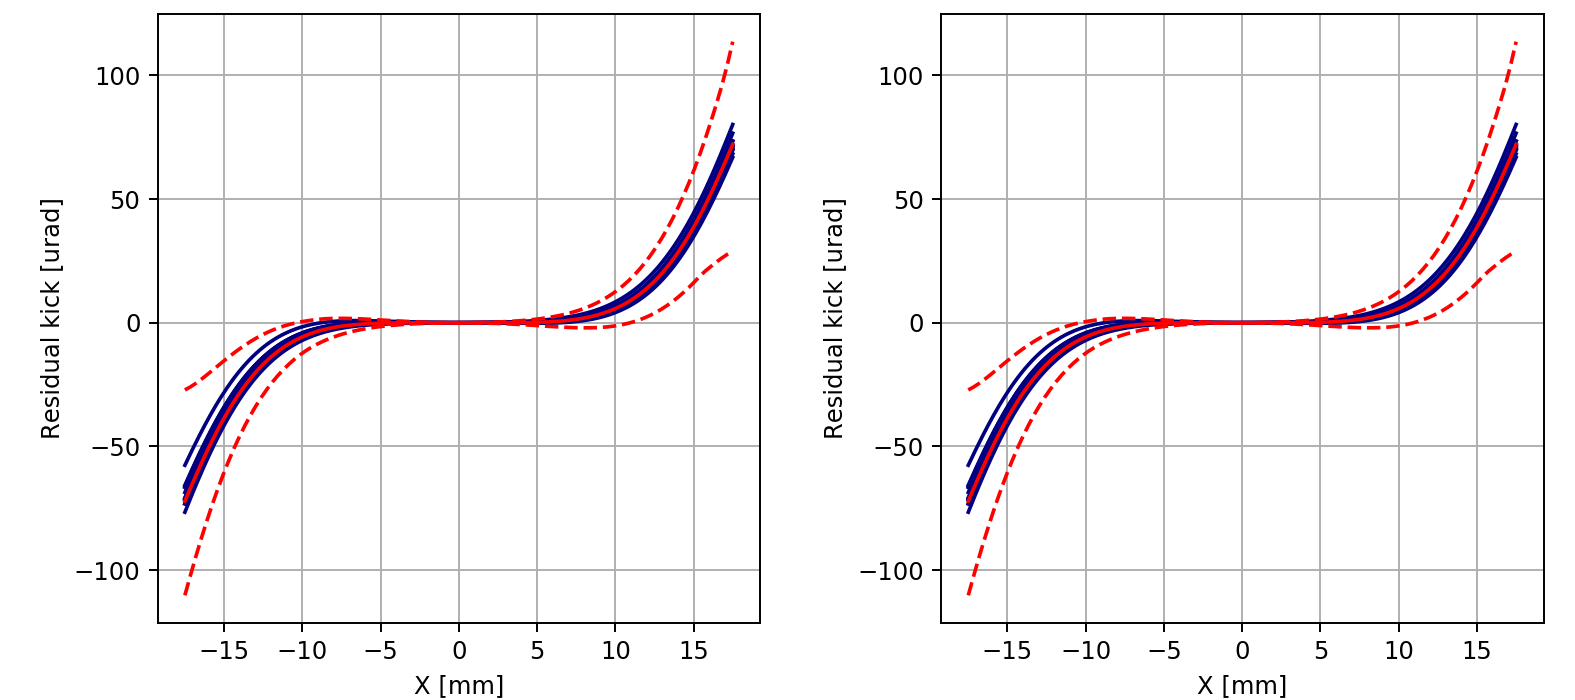

<IPython.core.display.Javascript object>


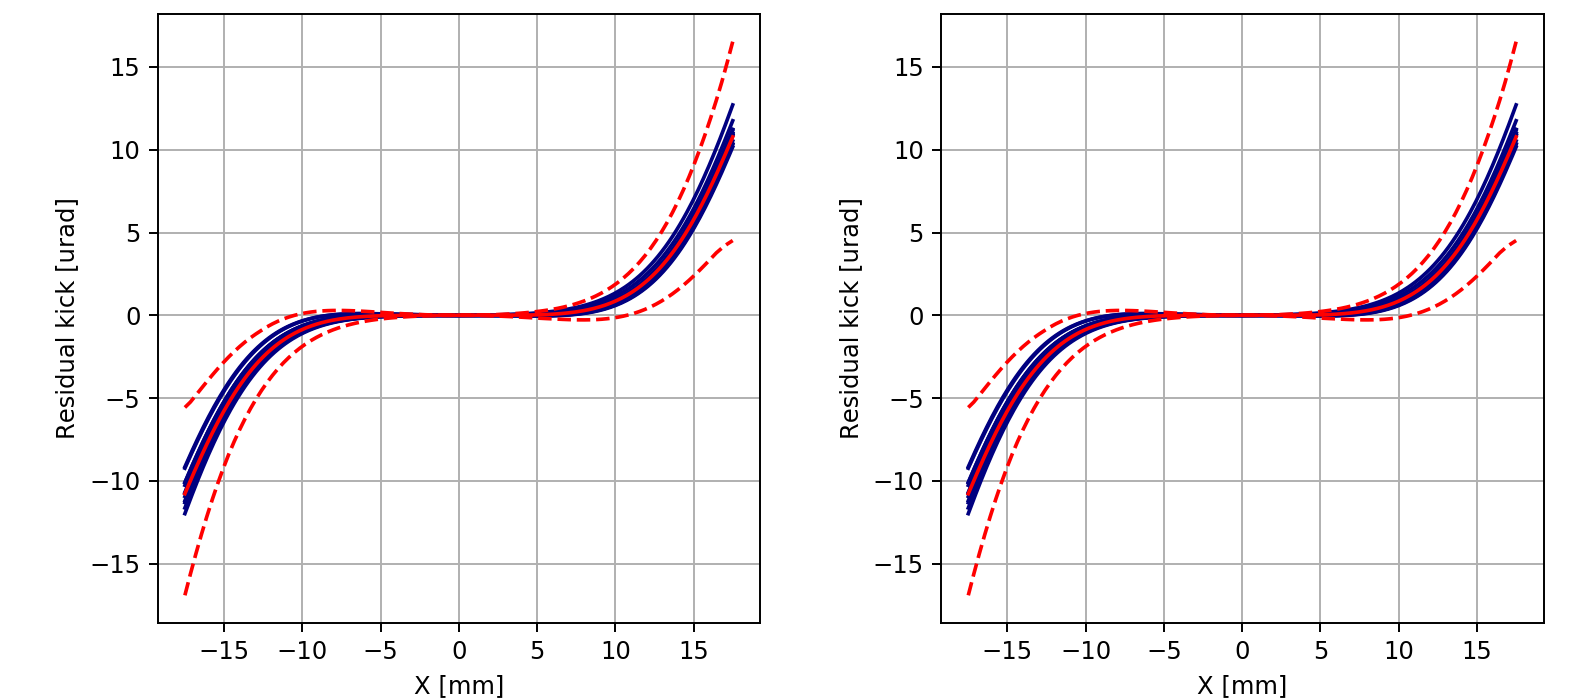

<IPython.core.display.Javascript object>


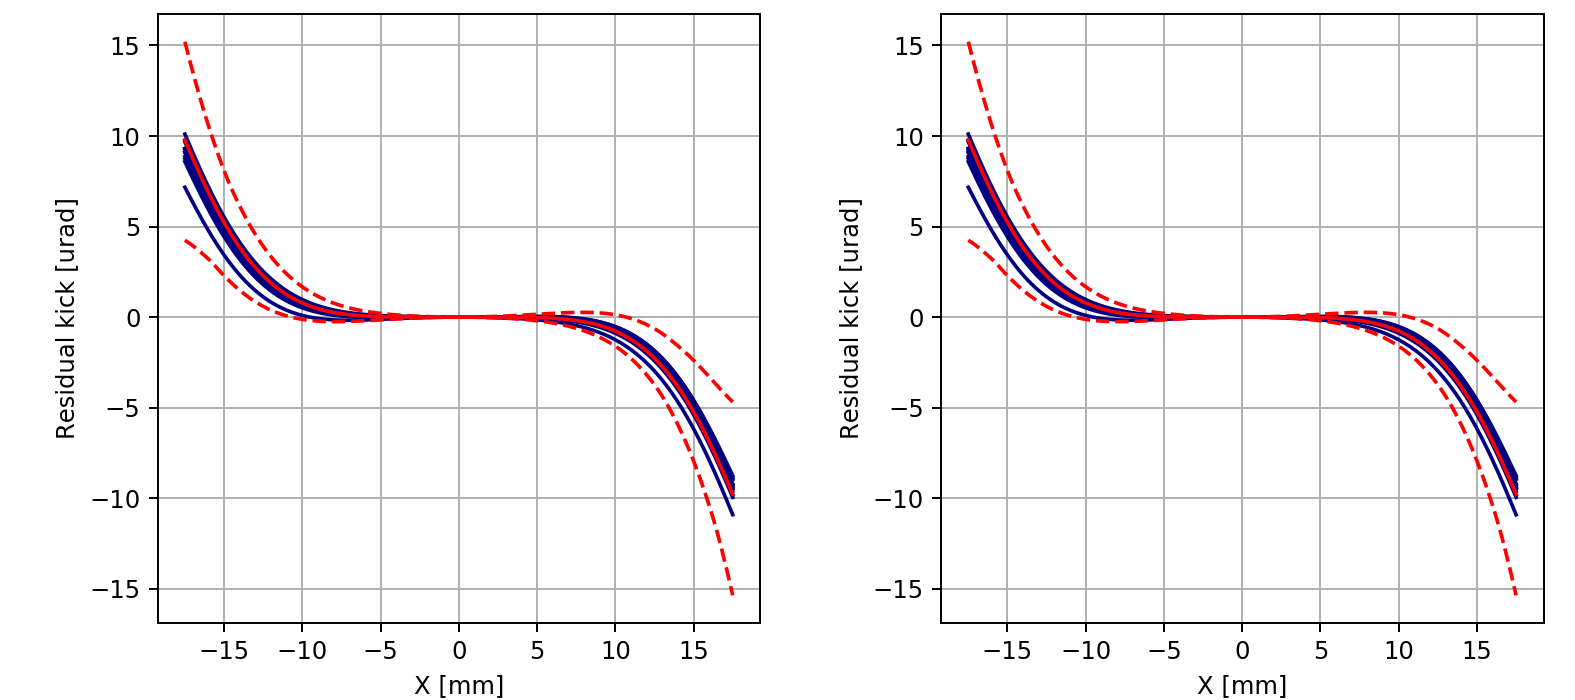

<IPython.core.display.Javascript object>


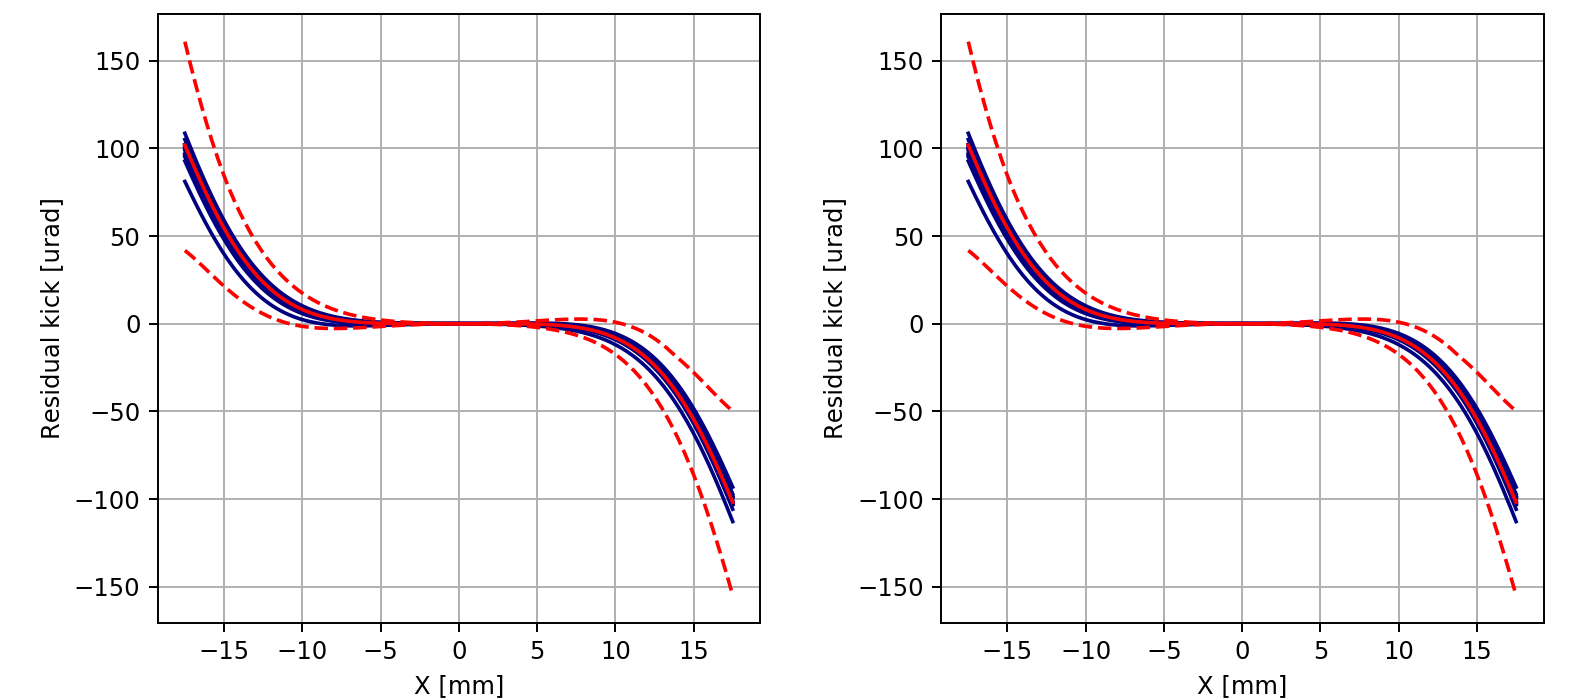

In [10]:
# Horizontal kick

curr_idx = [2, 5, 7, 12]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kickx_plot('M1', plt, curr_idx=i, energy=0.15, 
                                     excluded_monomials_plot1=(1,2),
                                     excluded_monomials_plot2=(1,2))
    plt.show()

<IPython.core.display.Javascript object>


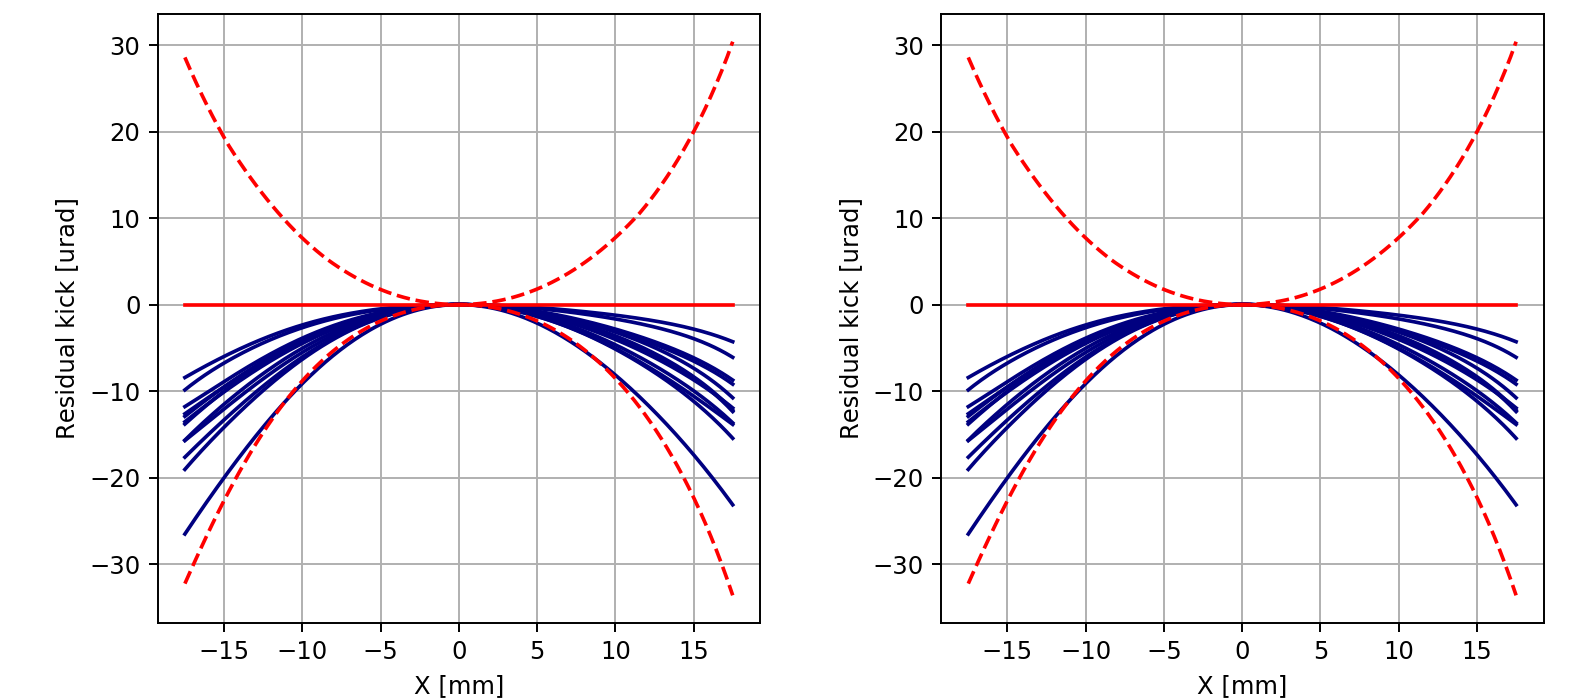

<IPython.core.display.Javascript object>


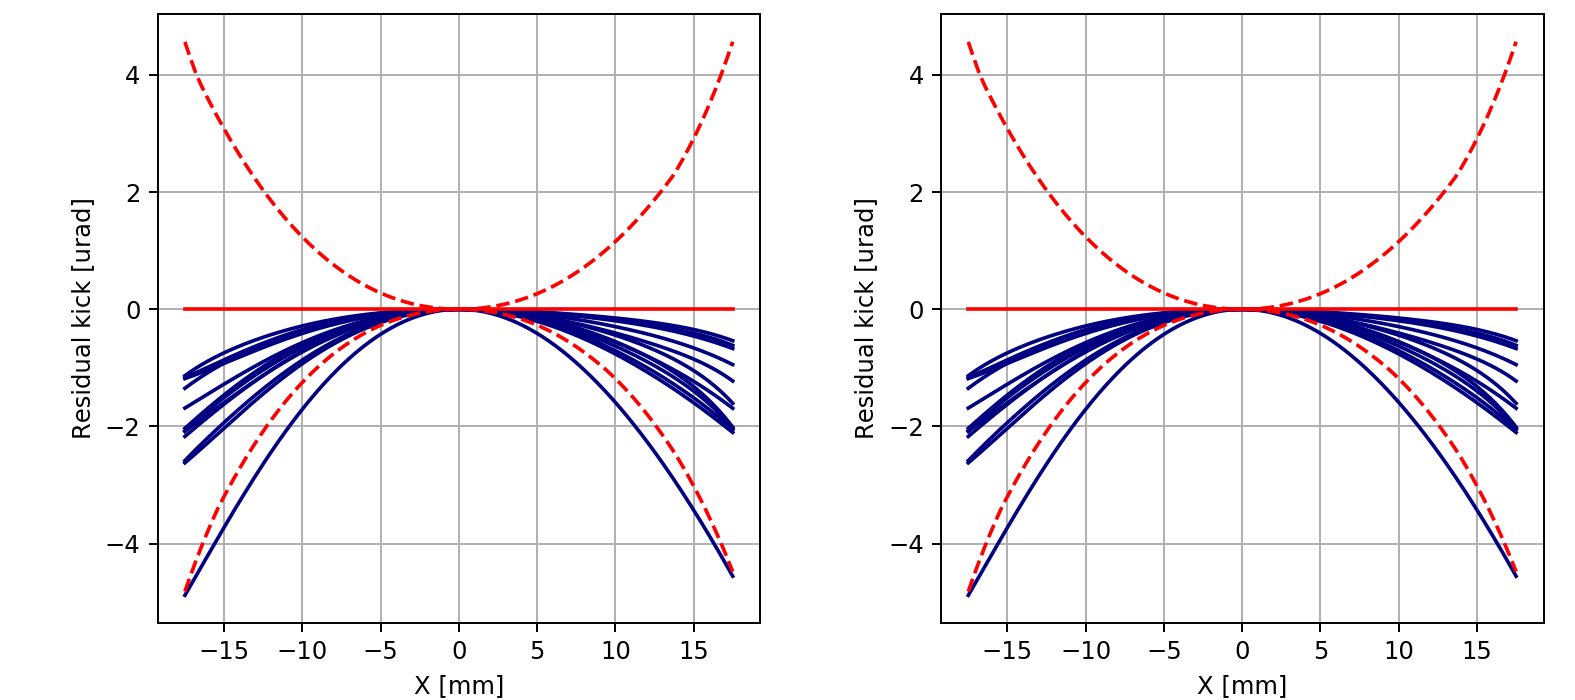

<IPython.core.display.Javascript object>


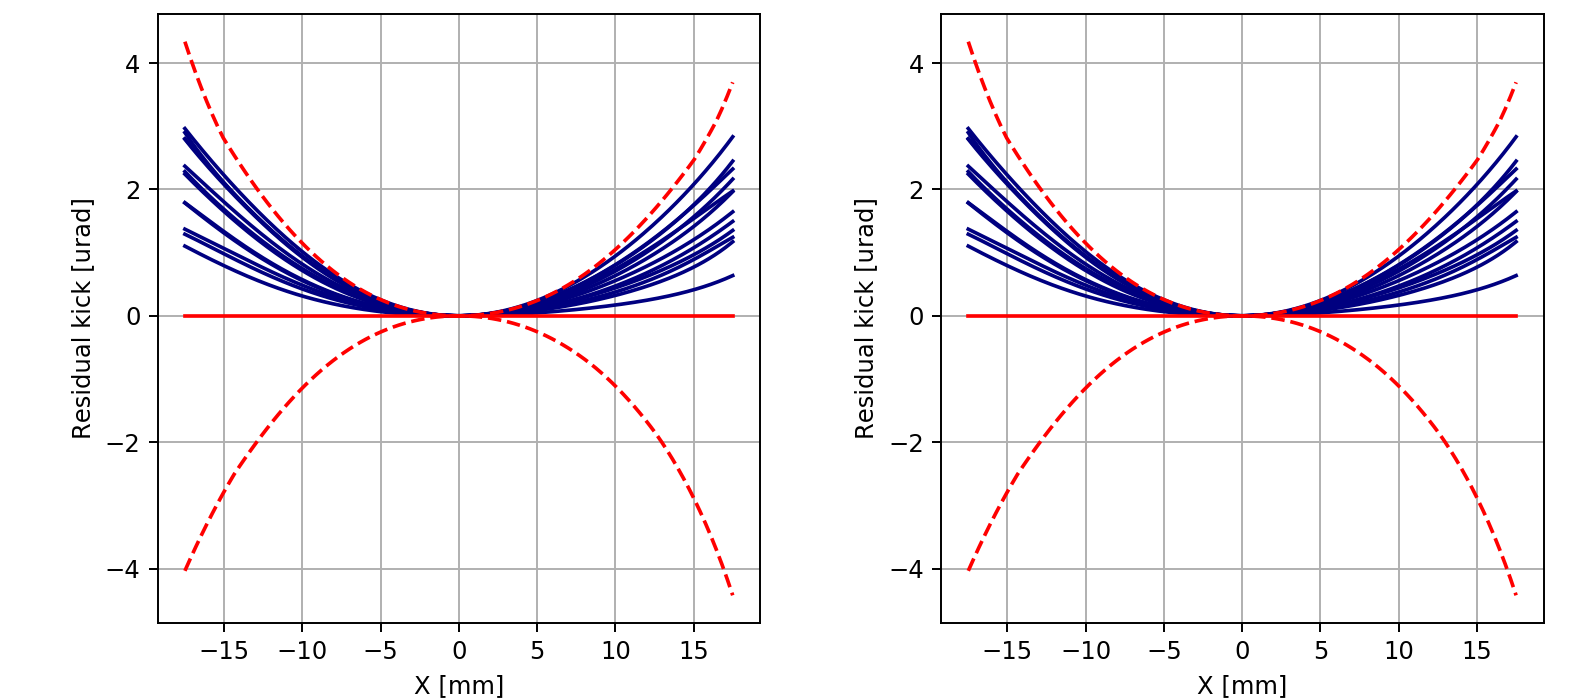

<IPython.core.display.Javascript object>


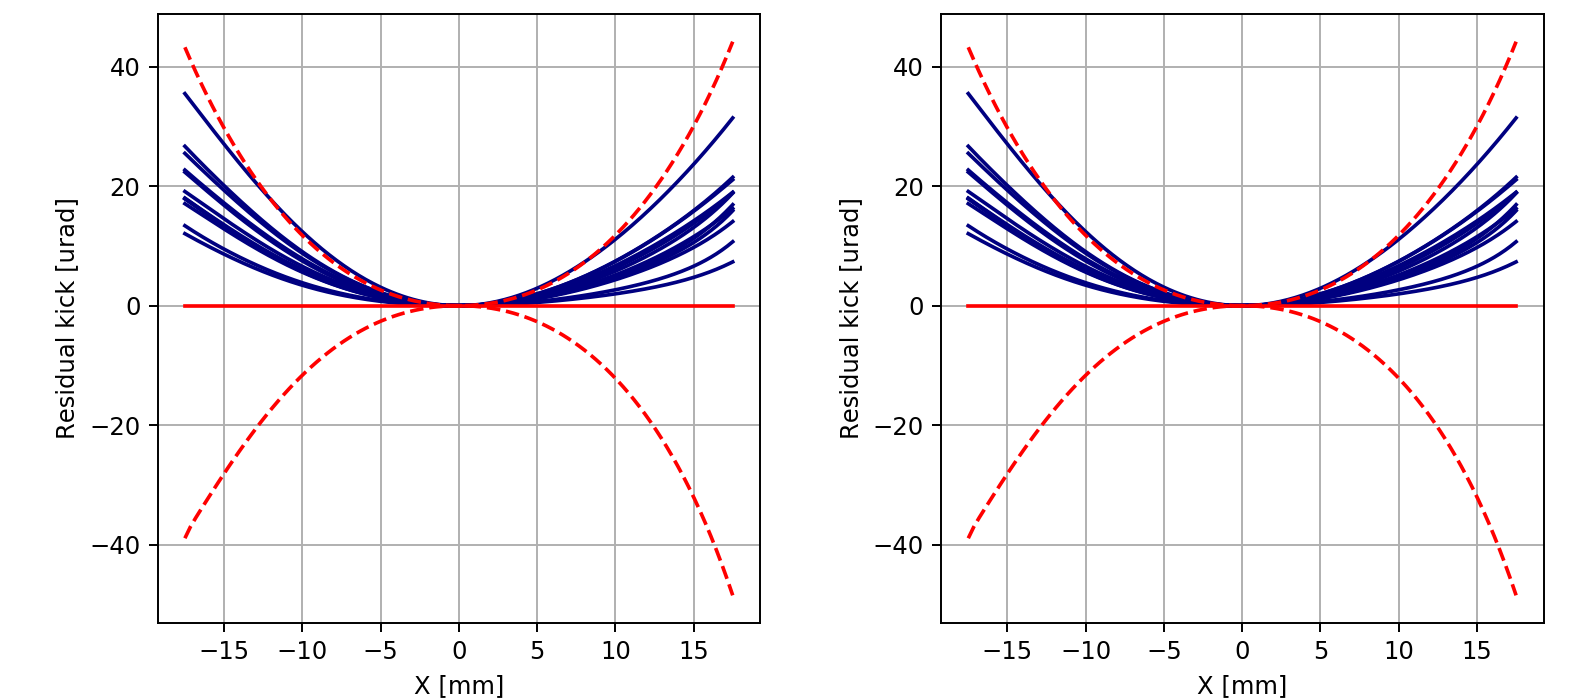

In [11]:
# Vertical kick

curr_idx = [2, 5, 7, 12]
for i in curr_idx:
    plt.figure(figsize=(9,4))
    data.multipole_errors_kicky_plot('M1', plt, curr_idx=i, energy=0.15, 
                                     excluded_monomials_plot1=(1,2),
                                     excluded_monomials_plot2=(1,2))
    plt.show()

# Magnets Sorting

In [12]:
med = 'M1'
print('Rampup')
c, gl = data.tmpl.get_rampup(med)
for i in range(len(c)):
    print('{:02d}: I = {:8.4f} A => GL = {:+.4f} T'.format(i, c[i], gl[i]))

Rampup
00: I = -10.0025 A => GL = +0.8307 T
01: I =  -9.0237 A => GL = +0.7522 T
02: I =  -7.0190 A => GL = +0.5883 T
03: I =  -5.0145 A => GL = +0.4224 T
04: I =  -3.0098 A => GL = +0.2554 T
05: I =  -1.0052 A => GL = +0.0879 T
06: I =  -0.0029 A => GL = +0.0041 T
07: I =   0.9993 A => GL = -0.0798 T
08: I =   3.0039 A => GL = -0.2476 T
09: I =   5.0085 A => GL = -0.4152 T
10: I =   7.0130 A => GL = -0.5825 T
11: I =   9.0179 A => GL = -0.7494 T
12: I =   9.9978 A => GL = -0.8307 T


In [16]:
# Print Multipoles Files

currents, _ = data.tmpl.get_rampup('M1')
stdout = sys.stdout
for cidx in range(0,len(currents)):
    sys.stdout = open('MULTIPOLES-{:.0f}A.txt'.format(currents[cidx]), 'w')
    data.readme_multipoles_print('M1', cidx)
    sys.stdout.flush()
sys.stdout = stdout